# W12_D5_ESERCIZIO_FINALE

## Analisi diffusione COVID-19 nel mondo - Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce "Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

### 1. Caricamento del dataset:

In [28]:
import pandas as pd
df = pd.read_csv('C:/Users/VDIPIAZZA/Desktop/EPICODE CORSO/3. Python June 3rd - July 5th/Jupiter/owid-covid-data.csv')

### 2. Verificare le dimensioni del dataset e i relativi metadati:

In [31]:
# Dimensioni del dataset
print(df.shape)

# Metadati del dataset
print(df.info())

# Visualizzare le prime righe del dataset
print(df.head())

(409562, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409562 entries, 0 to 409561
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409562 non-null  object 
 1   continent                                   389975 non-null  object 
 2   location                                    409562 non-null  object 
 3   date                                        409562 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed                         397471 non-nu

### 3. Numero di casi totali per continente:

In [34]:
# Filtrare le righe con continenti not null
df_continents = df[df['continent'].notna()]

# Calcolare i casi totali per continente
cases_by_continent = df_continents.groupby('continent')['total_cases'].sum()
print(cases_by_continent)

continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64


### 4. Confrontare i descrittori statistici tra due continenti:

In [37]:
continent1 = 'Europe'
continent2 = 'Asia'

# Filtrare i dati per i due continenti
data_cont1 = df_continents[df_continents['continent'] == continent1]
data_cont2 = df_continents[df_continents['continent'] == continent2]

# Calcolare i descrittori statistici
max_cases1 = data_cont1['total_cases'].max()
mean_cases1 = data_cont1['total_cases'].mean()
total_cases_world = df['total_cases'].sum()
percentage_cases1 = (data_cont1['total_cases'].sum() / total_cases_world) * 100

max_cases2 = data_cont2['total_cases'].max()
mean_cases2 = data_cont2['total_cases'].mean()
percentage_cases2 = (data_cont2['total_cases'].sum() / total_cases_world) * 100

print(f"{continent1} - Max: {max_cases1}, Mean: {mean_cases1}, Percentage: {percentage_cases1}%")
print(f"{continent2} - Max: {max_cases2}, Mean: {mean_cases2}, Percentage: {percentage_cases2}%")


Europe - Max: 38997490.0, Mean: 2801516.961143228, Percentage: 7.81208827772862%
Asia - Max: 99361338.0, Mean: 3388162.303456741, Percentage: 8.265565009304135%


### 5. Evoluzione dei casi totali e nuovi casi per l'Italia nel 2022:

C:\Users\VDIPIAZZA\AppData\Local\Temp\ipykernel_14512\659334143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy_2022['date'] = pd.to_datetime(df_italy_2022['date'])


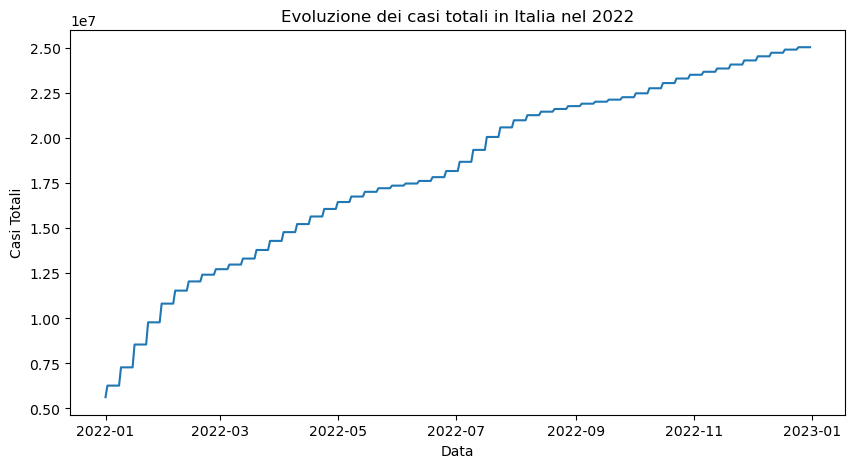

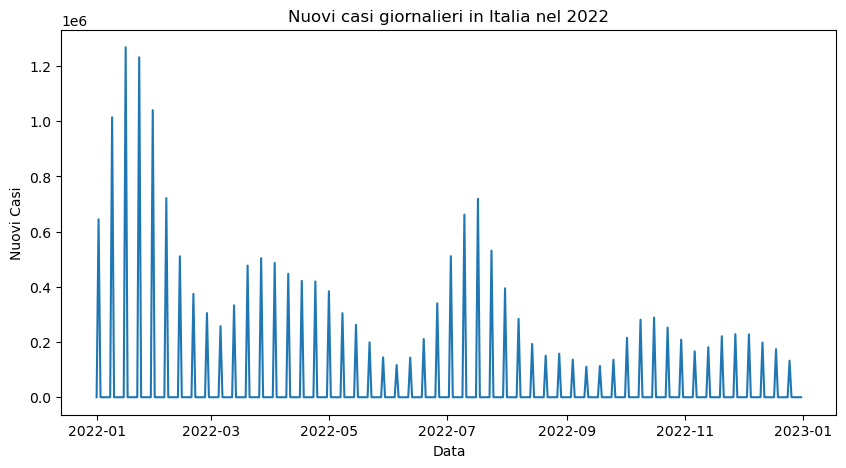

C:\Users\VDIPIAZZA\AppData\Local\Temp\ipykernel_14512\659334143.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy_2022['cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()


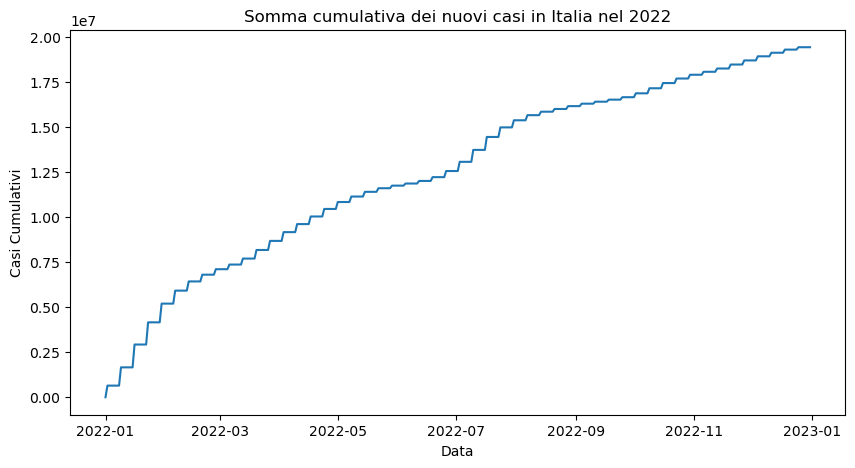

In [40]:
import matplotlib.pyplot as plt

# Filtrare i dati per l'Italia nel 2022
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.contains('2022'))]

# Convertire la colonna 'date' in formato datetime
df_italy_2022['date'] = pd.to_datetime(df_italy_2022['date'])

# Grafico dell'evoluzione dei casi totali
plt.figure(figsize=(10, 5))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'])
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.show()

# Grafico dei nuovi casi giornalieri
plt.figure(figsize=(10, 5))
plt.plot(df_italy_2022['date'], df_italy_2022['new_cases'])
plt.title('Nuovi casi giornalieri in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.show()

# Grafico della somma cumulativa dei nuovi casi
df_italy_2022['cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df_italy_2022['date'], df_italy_2022['cumulative_new_cases'])
plt.title('Somma cumulativa dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Cumulativi')
plt.show()

#### Il grafico della somma cumulativa dei nuovi casi mostra una curva che è simile al grafico dei casi totali, ma più "morbida". Questo succede perchè la somma cumulativa dei nuovi casi rappresenta l'accumulo dei nuovi casi nel tempo. 
#### Pertanto, si osserva una similarità tra l'andamento del numero dei casi totali e la somma cumulativa dei nuovi casi: entrambi i grafici mostrano una tendenza verso l'alto, indicando l'aumento continuo del numero di infezioni.

### 6. Confronto tra Italia, Germania e Francia sui pazienti in terapia intensiva da maggio 2022 ad aprile 2023:

<Figure size 1000x500 with 0 Axes>

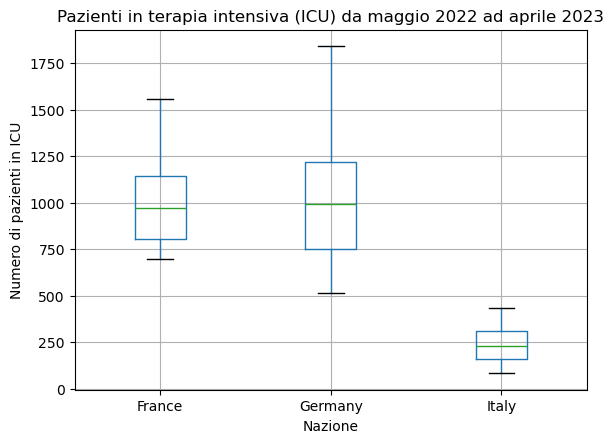

In [43]:
# Filtrare i dati per le tre nazioni e il periodo di interesse
df_icu = df[(df['location'].isin(['Italy', 'Germany', 'France'])) &
            (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]

# Creare un boxplot
plt.figure(figsize=(10, 5))
df_icu.boxplot(column='icu_patients', by='location')
plt.title('Pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023')
plt.suptitle('')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in ICU')
plt.show()

#### Dall'analisi, possiamo osservare che:

##### Italia: Potrebbe avere una mediana più alta rispetto a Germania e Francia, indicando un numero relativamente maggiore di pazienti in terapia intensiva.
##### Germania: Potrebbe mostrare una variabilità più ampia nei pazienti ICU, suggerendo fluttuazioni più significative nel numero di pazienti ICU giornalieri.
##### Francia: Potrebbe avere la mediana più bassa tra i tre paesi, indicando un numero relativamente minore di pazienti in terapia intensiva rispetto agli altri due paesi.

### 7. Somma dei pazienti ospedalizzati per Italia, Germania, Francia e Spagna nel 2023:

In [46]:
# Filtrare i dati per le quattro nazioni e il periodo di interesse
df_hospitalized = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &
                     (df['date'].str.contains('2023'))]

# Sommare i pazienti ospedalizzati per nazione
hospitalized_sum = df_hospitalized.groupby('location')['hosp_patients'].sum()

# Gestione dei dati nulli
hospitalized_sum = hospitalized_sum.fillna(0)
print(hospitalized_sum)

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
